### Librerías

In [1]:
# Librerías generales

import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import cv2

In [4]:
# Librerías para entrenamiento

D

In [2]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, BatchNormalization, Flatten, Conv2D, MaxPool2D, GlobalAveragePooling2D, Activation
from keras.optimizers import SGD, Adam, RMSprop
from keras.regularizers import l1, l2
from keras.constraints import MaxNorm
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, TensorBoard

### Lectura de datos utilizados para el entrenamiento del modelo

In [ ]:
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab Notebooks/Redes Neuronales/dl-itba-cifar-100-2024-q-1'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/Colab Notebooks/Redes Neuronales/dl-itba-cifar-100-2024-q-1/coarse_label_names.pck
/content/drive/MyDrive/Colab Notebooks/Redes Neuronales/dl-itba-cifar-100-2024-q-1/x_test.npy
/content/drive/MyDrive/Colab Notebooks/Redes Neuronales/dl-itba-cifar-100-2024-q-1/fine_label_names.pck
/content/drive/MyDrive/Colab Notebooks/Redes Neuronales/dl-itba-cifar-100-2024-q-1/x_train.npy
/content/drive/MyDrive/Colab Notebooks/Redes Neuronales/dl-itba-cifar-100-2024-q-1/y_train_fine.npy
/content/drive/MyDrive/Colab Notebooks/Redes Neuronales/dl-itba-cifar-100-2024-q-1/y_train_coarse.npy


In [ ]:
x_train = np.load("/content/drive/MyDrive/Colab Notebooks/Redes Neuronales/dl-itba-cifar-100-2024-q-1/x_train.npy")

y_train_fine = np.load("/content/drive/MyDrive/Colab Notebooks/Redes Neuronales/dl-itba-cifar-100-2024-q-1/y_train_fine.npy")

y_train_coarse = np.load("/content/drive/MyDrive/Colab Notebooks/Redes Neuronales/dl-itba-cifar-100-2024-q-1/y_train_coarse.npy")

with open("/content/drive/MyDrive/Colab Notebooks/Redes Neuronales/dl-itba-cifar-100-2024-q-1/fine_label_names.pck", "rb") as f:
    labels_fine = pickle.load(f)
f.close()

with open("/content/drive/MyDrive/Colab Notebooks/Redes Neuronales/dl-itba-cifar-100-2024-q-1/coarse_label_names.pck", "rb") as f:
    labels_coarse = pickle.load(f)
f.close()

In [ ]:
print(f'Dimensiones de x_train: {x_train.shape}')
print(f'Dimensiones de y_train_fine: {y_train_fine.shape}')
print(f'Dimensiones de y_train_coarse: {y_train_coarse.shape}')
print(f'Dimensiones de labels_fine: {len(labels_fine)}')
print(f'Dimensiones de labels_coarse: {len(labels_coarse)}')

Dimensiones de x_train: (50000, 32, 32, 3)
Dimensiones de y_train_fine: (50000,)
Dimensiones de y_train_coarse: (50000,)
Dimensiones de labels_fine: 100
Dimensiones de labels_coarse: 20


In [ ]:
y_train_union = np.array([[i,j] for i,j in zip(y_train_fine, y_train_coarse)])
print(y_train_union.shape)

(50000, 2)


In [ ]:
uniongonza = np.vstack([y_train_fine, y_train_coarse]).T
print(uniongonza.shape)

(50000, 2)


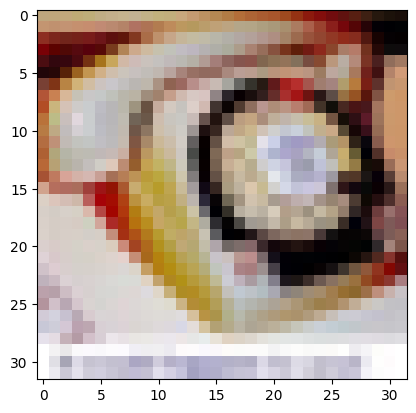

86
telephone
5
household_electrical_devices


In [ ]:
num = 5

img = x_train[num]
plt.imshow(img)
plt.show()
print(y_train_union[num][0])
print(labels_fine[y_train_union[num][0]])
print(y_train_union[num][1])
print(labels_coarse[y_train_union[num][1]])

In [ ]:
x_train_own, x_val_own, y_train_own, y_val_own = train_test_split(x_train, y_train_union, test_size=0.2, stratify=y_train_union)

In [ ]:
# prompt: I want to check correct stratification of data (stratification means same proportion of classes in train and validation data)

print(f'Shape of x_train_own: {x_train_own.shape}')
print(f'Shape of x_val_own: {x_val_own.shape}')
print(f'Shape of y_train_own: {y_train_own.shape}')
print(f'Shape of y_val_own: {y_val_own.shape}')

# Check class proportions in the original training data
unique_classes, class_counts = np.unique(y_train_union, axis=0, return_counts=True)
total_samples = len(y_train_union)
original_proportions = class_counts / total_samples

# Check class proportions in the training split
unique_train_classes, train_class_counts = np.unique(y_train_own, axis=0, return_counts=True)
train_total_samples = len(y_train_own)
train_proportions = train_class_counts / train_total_samples


# Check class proportions in the validation split
unique_val_classes, val_class_counts = np.unique(y_val_own, axis=0, return_counts=True)
val_total_samples = len(y_val_own)
val_proportions = val_class_counts / val_total_samples

print("Original Proportions:")
for i in range(len(unique_classes)):
    print(f"Class {unique_classes[i]}: {original_proportions[i]}")

print("\nTrain Proportions:")
for i in range(len(unique_train_classes)):
  print(f"Class {unique_train_classes[i]}: {train_proportions[i]}")


print("\nValidation Proportions:")
for i in range(len(unique_val_classes)):
  print(f"Class {unique_val_classes[i]}: {val_proportions[i]}")

Shape of x_train_own: (40000, 32, 32, 3)
Shape of x_val_own: (10000, 32, 32, 3)
Shape of y_train_own: (40000, 2)
Shape of y_val_own: (10000, 2)
Original Proportions:
Class [0 4]: 0.01
Class [1 1]: 0.01
Class [ 2 14]: 0.01
Class [3 8]: 0.01
Class [4 0]: 0.01
Class [5 6]: 0.01
Class [6 7]: 0.01
Class [7 7]: 0.01
Class [ 8 18]: 0.01
Class [9 3]: 0.01
Class [10  3]: 0.01
Class [11 14]: 0.01
Class [12  9]: 0.01
Class [13 18]: 0.01
Class [14  7]: 0.01
Class [15 11]: 0.01
Class [16  3]: 0.01
Class [17  9]: 0.01
Class [18  7]: 0.01
Class [19 11]: 0.01
Class [20  6]: 0.01
Class [21 11]: 0.01
Class [22  5]: 0.01
Class [23 10]: 0.01
Class [24  7]: 0.01
Class [25  6]: 0.01
Class [26 13]: 0.01
Class [27 15]: 0.01
Class [28  3]: 0.01
Class [29 15]: 0.01
Class [30  0]: 0.01
Class [31 11]: 0.01
Class [32  1]: 0.01
Class [33 10]: 0.01
Class [34 12]: 0.01
Class [35 14]: 0.01
Class [36 16]: 0.01
Class [37  9]: 0.01
Class [38 11]: 0.01
Class [39  5]: 0.01
Class [40  5]: 0.01
Class [41 19]: 0.01
Class [42 

In [ ]:
print(f'Dimensiones de x_train_own: {x_train_own.shape}')
print(f'Dimensiones de y_train_own: {y_train_own.shape}')

Dimensiones de x_train_own: (40000, 32, 32, 3)
Dimensiones de y_train_own: (40000, 2)


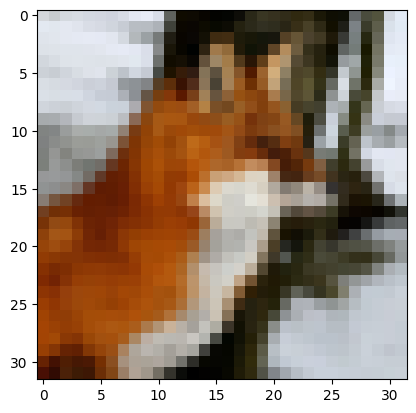

34
fox
12
medium_mammals


In [ ]:
num2 = 5

img_selected = x_train_own[num2]
plt.imshow(img_selected)
plt.show()

print(y_train_own[num2][0])
print(labels_fine[y_train_own[num2][0]])
print(y_train_own[num2][1])
print(labels_coarse[y_train_own[num2][1]])

In [ ]:
#INTENTO CON MAS CAPAS
import tensorflow as tf
from tensorflow.keras import layers, models

# Number of fine-grain (100) and coarse-grain (20) classes
fine_classes = 100
coarse_classes = 20


# Aquí usaríamos x_train como data_entrenamiento


# Define the input layer
input_layer = layers.Input(shape=(32, 32, 3), name="matrix_input")  # CIFAR-100 images

# normalization
normalization_layer = layers.Normalization(axis=-1, name="normalization_layer")
normalization_layer.adapt(x_train)
input_layer = normalization_layer(input_layer)
flatten_layer = layers.Flatten(name="flattened_input")(input_layer)
# Hidden layers
dense_512 = layers.Dense(512, activation='relu', name="dense_512")(flatten_layer)
dense_256 = layers.Dense(256, activation='relu', name="dense_256")(dense_512)
dense_128 = layers.Dense(128, activation='relu', name="dense_128")(dense_256)
dense_64 = layers.Dense(64, activation='relu', name="dense_64")(dense_128)

# Fine-grain prediction branch (100 classes)
fine_output = layers.Dense(fine_classes,
                           activation='softmax',
                           name='fine_output')(dense_64)

# Coarse-grain prediction branch (20 classes)
coarse_output = layers.Dense(coarse_classes,
                             activation='softmax',
                             name='coarse_output')(dense_64)

# Define the model with two outputs
model = models.Model(inputs=input_layer, outputs=[fine_output, coarse_output])

# Compile the model with separate loss functions for each output
model.compile(
    optimizer='adam',
    loss={'fine_output': 'sparse_categorical_crossentropy', 'coarse_output': 'sparse_categorical_crossentropy'},
    metrics={'fine_output': 'accuracy', 'coarse_output': 'accuracy'}
)


# Print model summary
model.summary()


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ keras_tensor_40CLONE      │ (None, 32, 32, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flattened_input (Flatten) │ (None, 3072)           │              0 │ keras_tensor_40CLONE[… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_512 (Dense)         │ (None, 512)            │      1,573,376 │ flattened_input[1][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_256 (Dense)         │ (None, 256)            │        131,328 │ dense_512[1][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_128 (Dense)         │ (None, 128)            │         32,896 │ dense_256[1][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_64 (Dense)          │ (None, 64)             │          8,256 │ dense_128[1][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ fine_output (Dense)       │ (None, 100)            │          6,500 │ dense_64[1][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ coarse_output (Dense)     │ (None, 20)             │          1,300 │ dense_64[1][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,753,656 (6.69 MB)

 Trainable params: 1,753,656 (6.69 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#INTENTO CON DROPOUT,
# USE ESTE AL FINAL, convine mas capas y dropout. ACA ESTA LA POSTA
from tensorflow.keras import layers, models
import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Número de clases
fine_classes = 100
coarse_classes = 20

# Entrada y normalización
input_layer = layers.Input(shape=(32, 32, 3), name="matrix_input")
normalization_layer = layers.Normalization(axis=-1, name="normalization_layer")
normalization_layer.adapt(x_train)  # Ajusta según los datos de entrenamiento

# Estructura de la red
x = normalization_layer(input_layer)
flatten_layer = layers.Flatten(name="flattened_input")(x)

# Capas ocultas con mayor capacidad y Dropout
dense_512 = layers.Dense(512, activation='relu', name="dense_512")(flatten_layer)
dropout_512 = layers.Dropout(0.2)(dense_512)
dense_256 = layers.Dense(256, activation='relu', name="dense_256")(dropout_512)
dropout_256 = layers.Dropout(0.2)(dense_256)
dense_128 = layers.Dense(128, activation='relu', name="dense_128")(dropout_256)
dense_64 = layers.Dense(64, activation='relu', name="dense_64")(dense_128)


# Fine-grain prediction branch (100 classes)
fine_output = layers.Dense(fine_classes,
                           activation='softmax',
                           name='fine_output')(dense_64)

# Coarse-grain prediction branch (20 classes)
coarse_output = layers.Dense(coarse_classes,
                             activation='softmax',
                             name='coarse_output')(dense_64)


# Define el modelo con dos salidas
model = models.Model(inputs=input_layer, outputs=[fine_output, coarse_output])

# Compile the model with separate loss functions for each output
model.compile(
    optimizer='adam',
    loss={'fine_output': 'sparse_categorical_crossentropy', 'coarse_output': 'sparse_categorical_crossentropy'},
    metrics={'fine_output': 'accuracy', 'coarse_output': 'accuracy'}
)


# Print model summary
model.summary()



Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ matrix_input (InputLayer) │ (None, 32, 32, 3)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization_layer       │ (None, 32, 32, 3)      │              7 │ matrix_input[0][0]     │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flattened_input (Flatten) │ (None, 3072)           │              0 │ normalization_layer[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_512 (Dense)         │ (None, 512)            │      1,573,376 │ flattened_input[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_8 (Dropout)       │ (None, 512)            │              0 │ dense_512[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_256 (Dense)         │ (None, 256)            │        131,328 │ dropout_8[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_9 (Dropout)       │ (None, 256)            │              0 │ dense_256[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_128 (Dense)         │ (None, 128)            │         32,896 │ dropout_9[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_64 (Dense)          │ (None, 64)             │          8,256 │ dense_128[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ fine_output (Dense)       │ (None, 100)            │          6,500 │ dense_64[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ coarse_output (Dense)     │ (None, 20)             │          1,300 │ dense_64[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,753,663 (6.69 MB)

 Trainable params: 1,753,656 (6.69 MB)

 Non-trainable params: 7 (32.00 B)

In [ ]:
#COMENTAMOS ESTE GRAFICO GIGANTE DE IVO
#from tensorflow.keras.utils import plot_model
#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
print(x_train_own.shape)
print(y_train_own.shape)

lista = y_train_own[:,0]
print(lista)

(40000, 32, 32, 3)
(40000, 2)
[42 95 19 ... 26 64 47]


In [ ]:
print(f"x_train_own shape: {x_train_own.shape}")
print(f"y_train_own shape: {y_train_own.shape}")
print(f"x_val_own shape: {x_val_own.shape}")
print(f"y_val_own shape: {y_val_own.shape}")


x_train_own shape: (40000, 32, 32, 3)
y_train_own shape: (40000, 2)
x_val_own shape: (10000, 32, 32, 3)
y_val_own shape: (10000, 2)


In [ ]:
#AGREGUE ACA UN PAR QUE ESTABAN EN EL OTRO
rlrop = ReduceLROnPlateau(
    monitor = "val_accuracy",
    factor = 0.5,
    patience = 3,
    verbose = 1,
    min_lr = 1e-5
)

es = EarlyStopping(
    monitor = "val_accuracy",
    patience = 5,
    verbose = 1,
    restore_best_weights = True
)

mc = ModelCheckpoint(
    "best_weights.weights.h5",
    monitor = "val_accuracy",
    verbose = 1,
    save_best_only = True,
    save_weights_only = True,

)

tb = TensorBoard(
    log_dir = "logs"
)

In [ ]:
#x_train_own, x_val_own, y_train_own, y_val_own = train_test_split(x_train, y_train_union, test_size=0.2, stratify=y_train_union)
# SIN LOS OTROS CALLBACKS CON MENOS BATCH
history = model.fit(
    x = x_train_own,
    y = {'fine_output': lista, 'coarse_output': y_train_own[:,1]},
    epochs = 10,
    batch_size = 32,
    validation_data = (x_val_own, {'fine_output': y_val_own[:,0], 'coarse_output': y_val_own[:,1]}),
    # Add the following line:
    callbacks=[tf.keras.callbacks.LambdaCallback(on_epoch_end=lambda epoch, logs: print(logs if logs is not None else "No logs available"))]

)

Epoch 1/10
1248/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - coarse_output_accuracy: 0.1407 - fine_output_accuracy: 0.0362 - loss: 7.2404{'coarse_output_accuracy': 0.1707250028848648, 'fine_output_accuracy': 0.05597500130534172, 'loss': 6.901590824127197, 'val_coarse_output_accuracy': 0.22439999878406525, 'val_fine_output_accuracy': 0.08659999817609787, 'val_loss': 6.417306423187256}
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 36s 27ms/step - coarse_output_accuracy: 0.1408 - fine_output_accuracy: 0.0363 - loss: 7.2396 - val_coarse_output_accuracy: 0.2244 - val_fine_output_accuracy: 0.0866 - val_loss: 6.4173
Epoch 2/10
1249/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - coarse_output_accuracy: 0.2295 - fine_output_accuracy: 0.0976 - loss: 6.3945{'coarse_output_accuracy': 0.23444999754428864, 'fine_output_accuracy': 0.10102500021457672, 'loss': 6.349236965179443, 'val_coarse_output_accuracy': 0.2563000023365021, 'val_fine_output_accuracy': 0.11249999701976776, 'val_loss': 6.1888508796691895}
1250/1250 ━━━━━━━━

In [ ]:
#x_train_own, x_val_own, y_train_own, y_val_own = train_test_split(x_train, y_train_union, test_size=0.2, stratify=y_train_union)
# ESTE ES CON EARLY STOP Y ReduceLROnPlateau. SAQUE EL EARLY STOP Y ME DIO MUCHO MEJOR
history = model.fit(
    x = x_train_own,
    y = {'fine_output': lista, 'coarse_output': y_train_own[:,1]},
    epochs = 20,
    batch_size = 64,
    validation_data = (x_val_own, {'fine_output': y_val_own[:,0], 'coarse_output': y_val_own[:,1]}),
    # Add the following line:
    callbacks=[tf.keras.callbacks.LambdaCallback(on_epoch_end=lambda epoch, logs: print(logs if logs is not None else "No logs available")), rlrop,
    mc]

)

Epoch 1/20
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - coarse_output_accuracy: 0.1308 - fine_output_accuracy: 0.0387 - loss: 7.2793{'coarse_output_accuracy': 0.1639000028371811, 'fine_output_accuracy': 0.05635000020265579, 'loss': 6.986175060272217, 'val_coarse_output_accuracy': 0.22830000519752502, 'val_fine_output_accuracy': 0.09679999947547913, 'val_loss': 6.454349994659424}
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 38ms/step - coarse_output_accuracy: 0.1309 - fine_output_accuracy: 0.0388 - loss: 7.2784 - val_coarse_output_accuracy: 0.2283 - val_fine_output_accuracy: 0.0968 - val_loss: 6.4543 - learning_rate: 0.0010
Epoch 2/20
  5/625 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - coarse_output_accuracy: 0.1829 - fine_output_accuracy: 0.1010 - loss: 6.4168

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_accuracy` which is not available. Available metrics are: coarse_output_accuracy,fine_output_accuracy,loss,val_coarse_output_accuracy,val_fine_output_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)
/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/model_checkpoint.py:206: UserWarning: Can save best model only with val_accuracy available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - coarse_output_accuracy: 0.2237 - fine_output_accuracy: 0.0935 - loss: 6.4397{'coarse_output_accuracy': 0.23330000042915344, 'fine_output_accuracy': 0.1002499982714653, 'loss': 6.38668966293335, 'val_coarse_output_accuracy': 0.260699987411499, 'val_fine_output_accuracy': 0.12210000306367874, 'val_loss': 6.150067329406738}
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - coarse_output_accuracy: 0.2237 - fine_output_accuracy: 0.0935 - loss: 6.4396 - val_coarse_output_accuracy: 0.2607 - val_fine_output_accuracy: 0.1221 - val_loss: 6.1501 - learning_rate: 0.0010
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - coarse_output_accuracy: 0.2574 - fine_output_accuracy: 0.1206 - loss: 6.1523{'coarse_output_accuracy': 0.2641499936580658, 'fine_output_accuracy': 0.1242000013589859, 'loss': 6.124065399169922, 'val_coarse_output_accuracy': 0.27799999713897705, 'val_fine_output_accuracy': 0.13750000298023224, 'val_loss': 6.008011341094971}
625/625 ━━━━━━━━